In [1]:
from nltk.corpus import PlaintextCorpusReader
import nltk
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
# pd.set_option('display.max_rows', 200)

In [2]:
corpus_root = "/Users/jianny/Genomics-Informatics-Corpus/raw_text2/"

In [3]:
file1 = PlaintextCorpusReader(corpus_root, 'gni-1-.*\\.txt', encoding='utf-8') 
file2 = PlaintextCorpusReader(corpus_root, 'gni-2.*\\.txt', encoding='utf-8') 
file3 = PlaintextCorpusReader(corpus_root, 'gni-3.*\\.txt', encoding='utf-8') 
file4 = PlaintextCorpusReader(corpus_root, 'gni-4.*\\.txt', encoding='utf-8')
file5 = PlaintextCorpusReader(corpus_root, 'gni-7.*\\.txt', encoding='utf-8')
file6 = PlaintextCorpusReader(corpus_root, 'gni-8.*\\.txt', encoding='utf-8')
file7 = PlaintextCorpusReader(corpus_root, 'gni-9.*\\.txt', encoding='utf-8')
file8 = PlaintextCorpusReader(corpus_root, 'gni-10.*\\.txt', encoding='utf-8')
file9 = PlaintextCorpusReader(corpus_root, 'gni-11.*\\.txt', encoding='utf-8')
file10 = PlaintextCorpusReader(corpus_root, 'gni-12.*\\.txt', encoding='utf-8')
file11 = PlaintextCorpusReader(corpus_root, 'gni-13.*\\.txt', encoding='utf-8')
file12 = PlaintextCorpusReader(corpus_root, 'gni-14.*\\.txt', encoding='utf-8')
file13 = PlaintextCorpusReader(corpus_root, 'gni-15.*\\.txt', encoding='utf-8')
file14 = PlaintextCorpusReader(corpus_root, 'gni-16.*\\.txt', encoding='utf-8')

In [4]:
#14개의 volumn을 각 7개씩 묶어서 분류
#volList_1 : vol.1~vol.9, volList_2 : vol.10 ~ vol.16
volList_1 = [file1,file2,file3,file4,file5,file6,file7]
volList_2 = [file8,file9,file10,file11,file12,file13,file14]

In [5]:
AlphaFileid1 = [] #volList_1
AlphaFileid2 = [] #volList_2

#AlphaFileid1과 AlphaFileid2에 각 volumn에 해당하는 파일들의 이름을 list로 저장
#volList_1
for i in range(len(volList_1)):
    fileid = volList_1[i].fileids()
    for j in range(len(fileid)):
        AlphaFileid1.append(fileid[j])

# volList_2
for i in range(len(volList_2)):
    fileid = volList_2[i].fileids()
    for j in range(len(fileid)):
        AlphaFileid2.append(fileid[j])

In [6]:
# 1) 대문자 약어들
def findUpper(raw_text):
    text = nltk.word_tokenize(raw_text)
    patternList = [w for w in text if re.search(r'^[A-Z]{2,5}$', w)] #약어에서 알파벳 5개 이상은 약어가 아니라고 임의로 처리함.
    return patternList

In [7]:
firstTotal1 = []
firstTotal2 = []

#각 volumn별로 frequency
for i in range(len(AlphaFileid1)):
    raw_text1 = file1.raw(AlphaFileid1[i])        
    text = findUpper(raw_text1)
    for j in text:
        firstTotal1.append([AlphaFileid1[i][4:5], j])
        
for i in range(len(AlphaFileid2)):
    raw_text2 = file8.raw(AlphaFileid2[i])        
    text = findUpper(raw_text2)
    for j in text:
        firstTotal2.append([AlphaFileid2[i][4:6], j])

In [8]:
#데이터 값들을 통합
firstTotal = firstTotal1 + firstTotal2

In [9]:
#통합한 데이터에 ConditionalFreqDist 함수 사용
cfd_word_test =  nltk.ConditionalFreqDist(firstTotal)

In [10]:
#DataFrame 생성
df1 = pd.DataFrame(cfd_word_test).replace(np.nan, 0)

In [11]:
newIndex1 = sorted(df1.index.tolist()) #찾아낸 용어들의 list 생성
print(newIndex1)

['AA', 'AAA', 'AAAG', 'AAAS', 'AAAT', 'AABB', 'AAC', 'AACC', 'AACR', 'AACT', 'AAF', 'AAG', 'AAT', 'AATGC', 'AAV', 'AB', 'ABBB', 'ABC', 'ABG', 'ABI', 'ABL', 'ABO', 'AC', 'ACA', 'ACB', 'ACC', 'ACCC', 'ACG', 'ACICU', 'ACID', 'ACM', 'ACMC', 'ACP', 'ACR', 'ACRD', 'ACT', 'ACTB', 'ACTH', 'AD', 'ADAR', 'ADB', 'ADFP', 'ADH', 'ADIR', 'ADME', 'ADMET', 'ADOS', 'ADP', 'ADPKD', 'ADPOQ', 'ADR', 'ADT', 'ADVIA', 'AE', 'AED', 'AERD', 'AES', 'AF', 'AFAP', 'AFETS', 'AFLP', 'AFP', 'AFT', 'AG', 'AGA', 'AGC', 'AGD', 'AGE', 'AGFA', 'AGG', 'AGH', 'AGI', 'AGO', 'AGT', 'AHEAD', 'AHSG', 'AI', 'AIDS', 'AIEC', 'AIM', 'AIMD', 'AIPOQ', 'AIU', 'AKAP', 'AKT', 'AL', 'ALA', 'ALD', 'ALDH', 'ALK', 'ALL', 'ALPL', 'ALS', 'ALT', 'ALUNC', 'AMC', 'AMD', 'AME', 'AMFE', 'AMIA', 'AML', 'AMOS', 'AMP', 'AMR', 'AMV', 'AND', 'ANG', 'ANOVA', 'AP', 'APA', 'APB', 'APC', 'APE', 'API', 'APL', 'APM', 'APOE', 'APP', 'APS', 'APSES', 'AQT', 'AR', 'AREA', 'AREB', 'AREG', 'ARG', 'ARH', 'ARHA', 'ARIC', 'ARID', 'ARM', 'ARMD', 'ARNT', 'ARS', 'ARSG'

In [12]:
#각 알파벳별로 정규표현식을 이용하여 종류별로 분류
listA = [w for w in newIndex1 if re.search('^A+',w)]
listB = [w for w in newIndex1 if re.search('^B+',w)]
listC = [w for w in newIndex1 if re.search('^C+',w)]
listD = [w for w in newIndex1 if re.search('^D+',w)]
listE = [w for w in newIndex1 if re.search('^E+',w)]
listF = [w for w in newIndex1 if re.search('^F+',w)]
listG = [w for w in newIndex1 if re.search('^G+',w)]
listH = [w for w in newIndex1 if re.search('^H+',w)]
listI = [w for w in newIndex1 if re.search('^I+',w)]

listJ = [w for w in newIndex1 if re.search('^J+',w)]
listK = [w for w in newIndex1 if re.search('^K+',w)]
listL = [w for w in newIndex1 if re.search('^L+',w)]
listM = [w for w in newIndex1 if re.search('^M+',w)]
listN = [w for w in newIndex1 if re.search('^N+',w)]
listO = [w for w in newIndex1 if re.search('^O+',w)]
listP = [w for w in newIndex1 if re.search('^P+',w)]
listQ = [w for w in newIndex1 if re.search('^Q+',w)]
listR = [w for w in newIndex1 if re.search('^R+',w)]
listS = [w for w in newIndex1 if re.search('^S+',w)]

listT = [w for w in newIndex1 if re.search('^T+',w)]
listU = [w for w in newIndex1 if re.search('^U+',w)]
listV = [w for w in newIndex1 if re.search('^V+',w)]
listW = [w for w in newIndex1 if re.search('^W+',w)]
listX = [w for w in newIndex1 if re.search('^X+',w)]
listY = [w for w in newIndex1 if re.search('^Y+',w)]
listZ = [w for w in newIndex1 if re.search('^Z+',w)]

In [13]:
print('> A로 시작하는 단어의 수 :', len(listA))
print('*****단어 리스트*****')
print(listA)
print()

print('> B로 시작하는 단어의 수 :', len(listB))
print('*****단어 리스트*****')
print(listB)
print()

print('> C로 시작하는 단어의 수 :', len(listC))
print('*****단어 리스트*****')
print(listC)
print()

print('> D로 시작하는 단어의 수 :', len(listD))
print('*****단어 리스트*****')
print(listD)
print()

print('> E로 시작하는 단어의 수 :', len(listE))
print('*****단어 리스트*****')
print(listE)
print()

print('> F로 시작하는 단어의 수 :', len(listF))
print('*****단어 리스트*****')
print(listF)
print()

print('> G로 시작하는 단어의 수 :', len(listG))
print('*****단어 리스트*****')
print(listG)
print()

print('> H로 시작하는 단어의 수 :', len(listH))
print('*****단어 리스트*****')
print(listH)
print()

print('> I로 시작하는 단어의 수 :', len(listI))
print('*****단어 리스트*****')
print(listI)
print()

print('> J로 시작하는 단어의 수 :', len(listJ))
print('*****단어 리스트*****')
print(listJ)
print()

print('> K로 시작하는 단어의 수 :', len(listK))
print('*****단어 리스트*****')
print(listK)
print()

print('> L로 시작하는 단어의 수 :', len(listL))
print('*****단어 리스트*****')
print(listL)
print()

print('> M로 시작하는 단어의 수 :', len(listM))
print('*****단어 리스트*****')
print(listM)
print()

print('> N로 시작하는 단어의 수 :', len(listN))
print('*****단어 리스트*****')
print(listN)
print()

print('> O로 시작하는 단어의 수 :', len(listO))
print('*****단어 리스트*****')
print(listO)
print()

print('> P로 시작하는 단어의 수 :', len(listP))
print('*****단어 리스트*****')
print(listP)
print()

print('> Q로 시작하는 단어의 수 :', len(listQ))
print('*****단어 리스트*****')
print(listQ)
print()

print('> R로 시작하는 단어의 수 :', len(listR))
print('*****단어 리스트*****')
print(listR)
print()

print('> S로 시작하는 단어의 수 :', len(listS))
print('*****단어 리스트*****')
print(listS)
print()

print('> T로 시작하는 단어의 수 :', len(listT))
print('*****단어 리스트*****')
print(listT)
print()

print('> U로 시작하는 단어의 수 :', len(listU))
print('*****단어 리스트*****')
print(listU)
print()

print('> V로 시작하는 단어의 수 :', len(listV))
print('*****단어 리스트*****')
print(listV)
print()

print('> W로 시작하는 단어의 수 :', len(listW))
print('*****단어 리스트*****')
print(listW)
print()

print('> X로 시작하는 단어의 수 :', len(listX))
print('*****단어 리스트*****')
print(listX)
print()

print('> Y로 시작하는 단어의 수 :', len(listY))
print('*****단어 리스트*****')
print(listY)
print()

print('> Z로 시작하는 단어의 수 :', len(listZ))
print('*****단어 리스트*****')
print(listZ)
print()

print('단어의 총 개수 : ', len(newIndex1))

> A로 시작하는 단어의 수 : 175
*****단어 리스트*****
['AA', 'AAA', 'AAAG', 'AAAS', 'AAAT', 'AABB', 'AAC', 'AACC', 'AACR', 'AACT', 'AAF', 'AAG', 'AAT', 'AATGC', 'AAV', 'AB', 'ABBB', 'ABC', 'ABG', 'ABI', 'ABL', 'ABO', 'AC', 'ACA', 'ACB', 'ACC', 'ACCC', 'ACG', 'ACICU', 'ACID', 'ACM', 'ACMC', 'ACP', 'ACR', 'ACRD', 'ACT', 'ACTB', 'ACTH', 'AD', 'ADAR', 'ADB', 'ADFP', 'ADH', 'ADIR', 'ADME', 'ADMET', 'ADOS', 'ADP', 'ADPKD', 'ADPOQ', 'ADR', 'ADT', 'ADVIA', 'AE', 'AED', 'AERD', 'AES', 'AF', 'AFAP', 'AFETS', 'AFLP', 'AFP', 'AFT', 'AG', 'AGA', 'AGC', 'AGD', 'AGE', 'AGFA', 'AGG', 'AGH', 'AGI', 'AGO', 'AGT', 'AHEAD', 'AHSG', 'AI', 'AIDS', 'AIEC', 'AIM', 'AIMD', 'AIPOQ', 'AIU', 'AKAP', 'AKT', 'AL', 'ALA', 'ALD', 'ALDH', 'ALK', 'ALL', 'ALPL', 'ALS', 'ALT', 'ALUNC', 'AMC', 'AMD', 'AME', 'AMFE', 'AMIA', 'AML', 'AMOS', 'AMP', 'AMR', 'AMV', 'AND', 'ANG', 'ANOVA', 'AP', 'APA', 'APB', 'APC', 'APE', 'API', 'APL', 'APM', 'APOE', 'APP', 'APS', 'APSES', 'AQT', 'AR', 'AREA', 'AREB', 'AREG', 'ARG', 'ARH', 'ARHA', 'ARIC', 'ARID

In [37]:
#DataFrame 출력
display(pd.DataFrame(cfd_word_test, index = newIndex1).replace(np.nan,0))

,1,2,3,4,7,8,9,10,11,12,13,14,15,16
MRC,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DNA,72.0,117.0,106.0,150.0,54.0,53.0,111.0,349.0,292.0,368.0,55.0,144.0,253.0,238.0
SNP,2.0,25.0,23.0,6.0,74.0,28.0,122.0,194.0,67.0,190.0,25.0,122.0,51.0,104.0
RNA,6.0,117.0,98.0,29.0,77.0,12.0,30.0,38.0,89.0,55.0,53.0,49.0,47.0,65.0
KEGG,1.0,16.0,5.0,5.0,12.0,7.0,0.0,20.0,8.0,3.0,3.0,29.0,4.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
PN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
NICEM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
SSI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [39]:
display(pd.DataFrame(cfd_word_test, index = newIndex1).replace(np.nan,0).head(50))

,1,2,3,4,7,8,9,10,11,12,13,14,15,16
AA,0.0,2.0,3.0,0.0,0.0,5.0,0.0,1.0,3.0,2.0,0.0,2.0,3.0,0.0
AAA,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAAG,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
AAAT,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AABB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
AAC,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
AACC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
AACR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
AACT,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
display(pd.DataFrame(cfd_word_test, index = newIndex1).replace(np.nan,0).tail(50))

,1,2,3,4,7,8,9,10,11,12,13,14,15,16
WT,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0
WTCCC,0.0,0.0,0.0,0.0,0.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WWOX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
WWW,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XAMPP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
XAXC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
XC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
XCI,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XEMBL,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XIAP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0


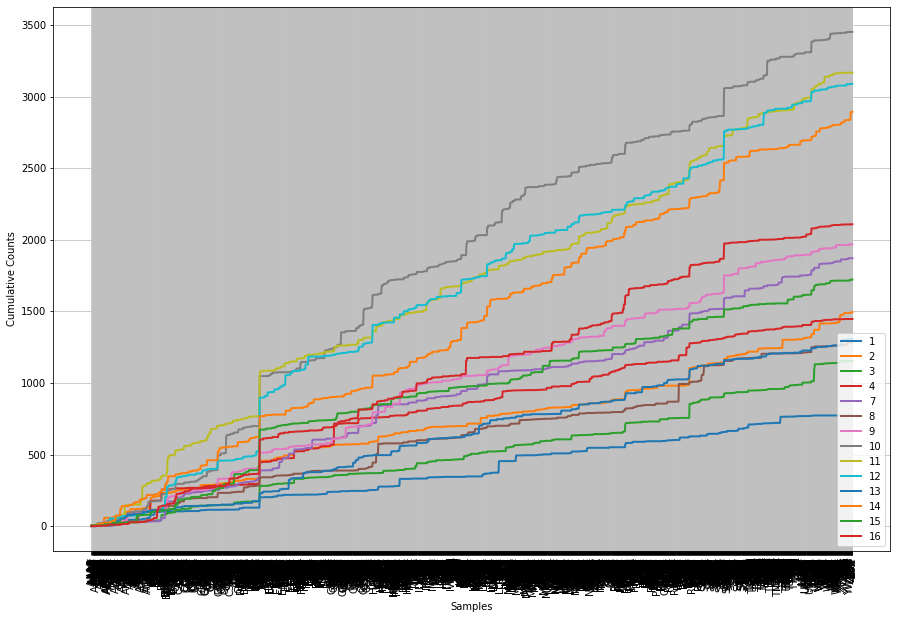

In [16]:
#cumulative plot 출력
plt.figure(figsize=(15,10))
cfd_word_test.plot(cumulative=True)

In [24]:
# 2)알파벳으로 시작하고 숫자로 끝나는 특수용어
def startAlphaEndNum(raw_text):
    text = nltk.word_tokenize(raw_text)
    patternList = [w for w in text if re.search(r'^[A-Za-z]+[0-9]+$', w)]
    return patternList

In [25]:
secondTotal1 = [] 
secondTotal2 = []

#각 volumn별로 frequency
for i in range(len(AlphaFileid1)):
    raw_text1 = file1.raw(AlphaFileid1[i])        
    text = startAlphaEndNum(raw_text1)
    for j in text:
        secondTotal1.append([AlphaFileid1[i][4:5], j])
        
for i in range(len(AlphaFileid2)):
    raw_text2 = file8.raw(AlphaFileid2[i])        
    text = startAlphaEndNum(raw_text2)
    for j in text:
        secondTotal2.append([AlphaFileid2[i][4:6], j])

In [26]:
#데이터 값들을 통합
secondTotal = secondTotal1 + secondTotal2

In [27]:
#통합한 데이터에 ConditionalFreqDist 함수 사용
cfd_last_num =  nltk.ConditionalFreqDist(secondTotal)

In [28]:
#DataFrame 생성
df2 = pd.DataFrame(cfd_last_num).replace(np.nan, 0)

In [29]:
newIndex2 = sorted(df2.index.tolist()) #찾아낸 용어들의 list 생성
print(newIndex2)

['A01', 'A04', 'A040002', 'A1', 'A10', 'A111218', 'A2', 'A3', 'A4', 'A5', 'A549', 'A6', 'AA458634', 'AA772777', 'AAV1', 'AB0057', 'AB069693', 'AB208946', 'ABCA1', 'ABCA10', 'ABCA3', 'ABCB1', 'ABCC2', 'ABCG2', 'ABF1', 'ABHD10', 'ABHD2', 'ABI3100', 'ABI3500', 'ABI3730', 'ABL1', 'ABL2', 'AC002350', 'AC002400', 'AC002508', 'ACE2', 'ACQB00000000', 'ACTBL2', 'ADAMTS9', 'ADCY1', 'ADCY2', 'ADCY3', 'ADCY5', 'ADCY8', 'ADD2', 'AF030624', 'AF030876', 'AF087017', 'AF10', 'AF121351', 'AF125183', 'AGPHD1', 'AGR3', 'AGTR2', 'AIFM1', 'AK1', 'AK128502', 'AK14', 'AK2', 'AK20', 'AK3', 'AK4', 'AK5', 'AK6', 'AK7', 'AKAP12', 'AKAP6', 'AKT1', 'AKT2', 'AKT3', 'AL034407', 'AL832004', 'ALL123', 'ALL129', 'ALL134', 'ALL143', 'ALL144', 'ALL26', 'ALL302', 'ALL321', 'ALL323', 'ALL48', 'ALL92', 'ALMS1', 'ALOX5', 'ALS2', 'ALX4', 'AMA1', 'AML1', 'AMPHORA2', 'ANK2', 'ANKRD36', 'ANTXR2', 'AP1', 'APBB2', 'APE1', 'APOA5', 'APOC1', 'APOER2', 'APOL3', 'APOL4', 'APOL6', 'APeg3', 'AQP1', 'AQP5', 'AQP7', 'ARAP1', 'ARHGEF12', 'A

In [30]:
#각 알파벳별로 정규표현식을 이용하여 종류별로 분류
listA = [w for w in newIndex2 if re.search('^A+',w)]
listB = [w for w in newIndex2 if re.search('^B+',w)]
listC = [w for w in newIndex2 if re.search('^C+',w)]
listD = [w for w in newIndex2 if re.search('^D+',w)]
listE = [w for w in newIndex2 if re.search('^E+',w)]
listF = [w for w in newIndex2 if re.search('^F+',w)]
listG = [w for w in newIndex2 if re.search('^G+',w)]
listH = [w for w in newIndex2 if re.search('^H+',w)]
listI = [w for w in newIndex2 if re.search('^I+',w)]

listJ = [w for w in newIndex2 if re.search('^J+',w)]
listK = [w for w in newIndex2 if re.search('^K+',w)]
listL = [w for w in newIndex2 if re.search('^L+',w)]
listM = [w for w in newIndex2 if re.search('^M+',w)]
listN = [w for w in newIndex2 if re.search('^N+',w)]
listO = [w for w in newIndex2 if re.search('^O+',w)]
listP = [w for w in newIndex2 if re.search('^P+',w)]
listQ = [w for w in newIndex2 if re.search('^Q+',w)]
listR = [w for w in newIndex2 if re.search('^R+',w)]
listS = [w for w in newIndex2 if re.search('^S+',w)]

listT = [w for w in newIndex2 if re.search('^T+',w)]
listU = [w for w in newIndex2 if re.search('^U+',w)]
listV = [w for w in newIndex2 if re.search('^V+',w)]
listW = [w for w in newIndex2 if re.search('^W+',w)]
listX = [w for w in newIndex2 if re.search('^X+',w)]
listY = [w for w in newIndex2 if re.search('^Y+',w)]
listZ = [w for w in newIndex2 if re.search('^Z+',w)]

In [31]:
print('> A로 시작하는 단어의 수 :', len(listA))
print('*****단어 리스트*****')
print(listA)
print()

print('> B로 시작하는 단어의 수 :', len(listB))
print('*****단어 리스트*****')
print(listB)
print()

print('> C로 시작하는 단어의 수 :', len(listC))
print('*****단어 리스트*****')
print(listC)
print()

print('> D로 시작하는 단어의 수 :', len(listD))
print('*****단어 리스트*****')
print(listD)
print()

print('> E로 시작하는 단어의 수 :', len(listE))
print('*****단어 리스트*****')
print(listE)
print()

print('> F로 시작하는 단어의 수 :', len(listF))
print('*****단어 리스트*****')
print(listF)
print()

print('> G로 시작하는 단어의 수 :', len(listG))
print('*****단어 리스트*****')
print(listG)
print()

print('> H로 시작하는 단어의 수 :', len(listH))
print('*****단어 리스트*****')
print(listH)
print()

print('> I로 시작하는 단어의 수 :', len(listI))
print('*****단어 리스트*****')
print(listI)
print()

print('> J로 시작하는 단어의 수 :', len(listJ))
print('*****단어 리스트*****')
print(listJ)
print()

print('> K로 시작하는 단어의 수 :', len(listK))
print('*****단어 리스트*****')
print(listK)
print()

print('> L로 시작하는 단어의 수 :', len(listL))
print('*****단어 리스트*****')
print(listL)
print()

print('> M로 시작하는 단어의 수 :', len(listM))
print('*****단어 리스트*****')
print(listM)
print()

print('> N로 시작하는 단어의 수 :', len(listN))
print('*****단어 리스트*****')
print(listN)
print()

print('> O로 시작하는 단어의 수 :', len(listO))
print('*****단어 리스트*****')
print(listO)
print()

print('> P로 시작하는 단어의 수 :', len(listP))
print('*****단어 리스트*****')
print(listP)
print()

print('> Q로 시작하는 단어의 수 :', len(listQ))
print('*****단어 리스트*****')
print(listQ)
print()

print('> R로 시작하는 단어의 수 :', len(listR))
print('*****단어 리스트*****')
print(listR)
print()

print('> S로 시작하는 단어의 수 :', len(listS))
print('*****단어 리스트*****')
print(listS)
print()

print('> T로 시작하는 단어의 수 :', len(listT))
print('*****단어 리스트*****')
print(listT)
print()

print('> U로 시작하는 단어의 수 :', len(listU))
print('*****단어 리스트*****')
print(listU)
print()

print('> V로 시작하는 단어의 수 :', len(listV))
print('*****단어 리스트*****')
print(listV)
print()

print('> W로 시작하는 단어의 수 :', len(listW))
print('*****단어 리스트*****')
print(listW)
print()

print('> X로 시작하는 단어의 수 :', len(listX))
print('*****단어 리스트*****')
print(listX)
print()

print('> Y로 시작하는 단어의 수 :', len(listY))
print('*****단어 리스트*****')
print(listY)
print()

print('> Z로 시작하는 단어의 수 :', len(listZ))
print('*****단어 리스트*****')
print(listZ)
print()

print('단어의 총 개수 : ', len(newIndex2))

> A로 시작하는 단어의 수 : 171
*****단어 리스트*****
['A01', 'A04', 'A040002', 'A1', 'A10', 'A111218', 'A2', 'A3', 'A4', 'A5', 'A549', 'A6', 'AA458634', 'AA772777', 'AAV1', 'AB0057', 'AB069693', 'AB208946', 'ABCA1', 'ABCA10', 'ABCA3', 'ABCB1', 'ABCC2', 'ABCG2', 'ABF1', 'ABHD10', 'ABHD2', 'ABI3100', 'ABI3500', 'ABI3730', 'ABL1', 'ABL2', 'AC002350', 'AC002400', 'AC002508', 'ACE2', 'ACQB00000000', 'ACTBL2', 'ADAMTS9', 'ADCY1', 'ADCY2', 'ADCY3', 'ADCY5', 'ADCY8', 'ADD2', 'AF030624', 'AF030876', 'AF087017', 'AF10', 'AF121351', 'AF125183', 'AGPHD1', 'AGR3', 'AGTR2', 'AIFM1', 'AK1', 'AK128502', 'AK14', 'AK2', 'AK20', 'AK3', 'AK4', 'AK5', 'AK6', 'AK7', 'AKAP12', 'AKAP6', 'AKT1', 'AKT2', 'AKT3', 'AL034407', 'AL832004', 'ALL123', 'ALL129', 'ALL134', 'ALL143', 'ALL144', 'ALL26', 'ALL302', 'ALL321', 'ALL323', 'ALL48', 'ALL92', 'ALMS1', 'ALOX5', 'ALS2', 'ALX4', 'AMA1', 'AML1', 'AMPHORA2', 'ANK2', 'ANKRD36', 'ANTXR2', 'AP1', 'APBB2', 'APE1', 'APOA5', 'APOC1', 'APOER2', 'APOL3', 'APOL4', 'APOL6', 'APeg3', 'AQP1', 

['S1', 'S100', 'S14', 'S2', 'S3', 'S4', 'S5', 'S6', 'SAMM50', 'SART3', 'SC1', 'SC35', 'SDK1', 'SEPIRNB5', 'SEPRINB12', 'SEPRINB5', 'SER135', 'SERPINB12', 'SERPINB5', 'SETD2', 'SETDB1', 'SFH1', 'SFRP1', 'SFRP2', 'SFRP4', 'SFU1', 'SFXN1', 'SGSM1', 'SH2', 'SH3', 'SHANK3', 'SHAPEIT2', 'SHRiMP2', 'SIAH2', 'SIC1', 'SIM4', 'SIP1', 'SKBr3', 'SKF91488', 'SKP2', 'SL7', 'SLIT2', 'SLIT3', 'SLU7', 'SM000382', 'SM00382', 'SMAD4', 'SMAD5', 'SMARCC2', 'SMC1', 'SMC3', 'SMN1', 'SMN2', 'SMP4', 'SNAI2', 'SNAP25', 'SNAPC3', 'SNF5', 'SNHG1', 'SNHG7', 'SNP1', 'SNP2', 'SNP2123', 'SNP3', 'SNP50', 'SNP511', 'SNPs17249754', 'SNTB2', 'SNU398', 'SNW1', 'SNX9', 'SO4', 'SOAP2', 'SOD1', 'SOD2', 'SORBS1', 'SORBS2', 'SOX1', 'SOX10', 'SOX2', 'SOX5', 'SOX9', 'SP1', 'SP6', 'SP7', 'SPATA17', 'SPGY1', 'SPICE1', 'SPP1', 'SPRY2', 'SR0', 'SR5', 'SRA045635', 'SRD1', 'SREBP1', 'SRIP1', 'SSBP1', 'STAB2', 'STAG1', 'STAG2', 'STAT1', 'STAT2', 'STAT3', 'STAT4', 'STAT6', 'STIM1', 'STK11', 'STK15', 'STK19', 'STK5', 'STMN1', 'SUR1', 'SU

In [35]:
#DataFrame 출력
display(pd.DataFrame(cfd_last_num, index = newIndex2).replace(np.nan,0))

,1,2,3,4,7,8,9,10,11,12,13,14,15,16
X9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Xl2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X59,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AF030876,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rs527248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
HISAT2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
BAP1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
NTRK1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [41]:
display(pd.DataFrame(cfd_last_num, index = newIndex2).replace(np.nan,0).head(50))

,1,2,3,4,7,8,9,10,11,12,13,14,15,16
A01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
A04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
A040002,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1,0.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,2.0,0.0
A10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
A111218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
A2,0.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0
A3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A4,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [44]:
display(pd.DataFrame(cfd_last_num, index = newIndex1).replace(np.nan,0).tail(50))

,1,2,3,4,7,8,9,10,11,12,13,14,15,16
WT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WTCCC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WWOX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WWW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XAMPP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XAXC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XCI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XEMBL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XIAP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#cumulative plot 출력
plt.figure(figsize=(15,10))
cfd_last_num.plot(cumulative=True)

In [ ]:
df2.D

In [ ]:
# 3) 숫자로 시작하고 소문자로 끝나는 특수용어
def startNumEndAlpha(raw_text):
    text = nltk.word_tokenize(raw_text)
    patternList = [w for w in text if re.search(r'^[0-9]+[a-z]+$', w)]
    return patternList

In [ ]:
thirdTotal1 = []
thirdTotal2 = []

#각 volumn별, file의 raw 데이터별로 정규표현식 함수를 적용 후의 frequency
for i in range(len(AlphaFileid1)):
    raw_text1 = file1.raw(AlphaFileid1[i])        
    text = startNumEndAlpha(raw_text1)
    for j in text:
        thirdTotal1.append([AlphaFileid1[i][4:5], j])
        
for i in range(len(AlphaFileid2)):
    raw_text2 = file8.raw(AlphaFileid2[i])        
    text = startNumEndAlpha(raw_text2)
    for j in text:
        thirdTotal2.append([AlphaFileid2[i][4:6], j])

In [ ]:
#데이터 값들을 통합
thirdTotal = thirdTotal1 + thirdTotal2

In [ ]:
#통합한 데이터에 ConditionalFreqDist 함수 사용
cfd_last_alpha =  nltk.ConditionalFreqDist(thirdTotal)

In [ ]:
#DataFrame 생성
df3 = pd.DataFrame(cfd_last_alpha).replace(np.nan, 0)

In [ ]:
newIndex3 = sorted(df3.index.tolist())#찾아낸 용어들의 list 생성
print(newIndex3)

In [ ]:
#내림차순으로 정규표현식을 이용하여 종류별로 분류
list0 = [w for w in newIndex3 if re.search('^0+',w)]
list1 = [w for w in newIndex3 if re.search('^1+',w)]
list2 = [w for w in newIndex3 if re.search('^2+',w)]
list3 = [w for w in newIndex3 if re.search('^3+',w)]
list4 = [w for w in newIndex3 if re.search('^4+',w)]
list5 = [w for w in newIndex3 if re.search('^5+',w)]
list6 = [w for w in newIndex3 if re.search('^6+',w)]
list7 = [w for w in newIndex3 if re.search('^7+',w)]
list8 = [w for w in newIndex3 if re.search('^8+',w)]
list9 = [w for w in newIndex3 if re.search('^9+',w)]

In [ ]:
print('> 0으로 시작하는 단어의 수 :', len(list0))
print('*****단어 리스트*****')
print(list0)
print()

print('> 1로 시작하는 단어의 수 :', len(list1))
print('*****단어 리스트*****')
print(list1)
print()

print('> 2로 시작하는 단어의 수 :', len(list2))
print('*****단어 리스트*****')
print(list2)
print()

print('> 3으로 시작하는 단어의 수 :', len(list3))
print('*****단어 리스트*****')
print(list3)
print()

print('> 4로 시작하는 단어의 수 :', len(list4))
print('*****단어 리스트*****')
print(list4)
print()

print('> 5로 시작하는 단어의 수 :', len(list5))
print('*****단어 리스트*****')
print(list5)
print()

print('> 6으로 시작하는 단어의 수 :', len(list6))
print('*****단어 리스트*****')
print(list6)
print()

print('> 7로 시작하는 단어의 수 :', len(list7))
print('*****단어 리스트*****')
print(list7)
print()

print('> 8로 시작하는 단어의 수 :', len(list8))
print('*****단어 리스트*****')
print(list8)
print()

print('> 9로 시작하는 단어의 수 :', len(list9))
print('*****단어 리스트*****')
print(list9)
print()

print('단어의 총 개수 : ', len(newIndex3))

In [ ]:
#DataFrame 출력
display(pd.DataFrame(cfd_last_alpha, index=newIndex3).replace(np.nan, 0))

In [ ]:
#cumulative plot 출력
plt.figure(figsize=(15,10))
cfd_last_alpha.plot(cumulative=True)

In [ ]:
# 4) 첫번째 단어는 대문자로 시작하여 두개의 단어가 -로 연결되어 있는 특수용어
def connectHyphen(raw_text):
    text = nltk.word_tokenize(raw_text)
    patternList = [w for w in text if re.search(r'^[A-Z]+\-[A-Za-z]+$', w)]
    return patternList

In [ ]:
fourthTotal1 = []
fourthTotal2 = []

#각 volumn별, file의 raw 데이터별로 정규표현식 함수를 적용 후의 frequency
for i in range(len(AlphaFileid1)):
    raw_text1 = file1.raw(AlphaFileid1[i])        
    text = connectHyphen(raw_text1)
    for j in text:
        fourthTotal1.append([AlphaFileid1[i][4:5], j])
        
for i in range(len(AlphaFileid2)):
    raw_text2 = file8.raw(AlphaFileid2[i])        
    text = connectHyphen(raw_text2)
    for j in text:
        fourthTotal2.append([AlphaFileid2[i][4:6], j])

In [ ]:
#데이터 값들을 통합
fourthTotal = fourthTotal1 + fourthTotal2

In [ ]:
#통합한 데이터에 ConditionalFreqDist 함수 사용
cfd_conn_hy =  nltk.ConditionalFreqDist(fourthTotal)

In [ ]:
#DataFrame 생성
df4 = pd.DataFrame(cfd_conn_hy).replace(np.nan, 0)

In [ ]:
newIndex4 = sorted(df4.index.tolist()) #찾아낸 용어들의 list 생성
print(newIndex4)

In [ ]:
#각 알파벳별로 정규표현식을 이용하여 종류별로 분류
listA = [w for w in newIndex4 if re.search('^A+',w)]
listB = [w for w in newIndex4 if re.search('^B+',w)]
listC = [w for w in newIndex4 if re.search('^C+',w)]
listD = [w for w in newIndex4 if re.search('^D+',w)]
listE = [w for w in newIndex4 if re.search('^E+',w)]
listF = [w for w in newIndex4 if re.search('^F+',w)]
listG = [w for w in newIndex4 if re.search('^G+',w)]
listH = [w for w in newIndex4 if re.search('^H+',w)]
listI = [w for w in newIndex4 if re.search('^I+',w)]

listJ = [w for w in newIndex4 if re.search('^J+',w)]
listK = [w for w in newIndex4 if re.search('^K+',w)]
listL = [w for w in newIndex4 if re.search('^L+',w)]
listM = [w for w in newIndex4 if re.search('^M+',w)]
listN = [w for w in newIndex4 if re.search('^N+',w)]
listO = [w for w in newIndex4 if re.search('^O+',w)]
listP = [w for w in newIndex4 if re.search('^P+',w)]
listQ = [w for w in newIndex4 if re.search('^Q+',w)]
listR = [w for w in newIndex4 if re.search('^R+',w)]
listS = [w for w in newIndex4 if re.search('^S+',w)]

listT = [w for w in newIndex4 if re.search('^T+',w)]
listU = [w for w in newIndex4 if re.search('^U+',w)]
listV = [w for w in newIndex4 if re.search('^V+',w)]
listW = [w for w in newIndex4 if re.search('^W+',w)]
listX = [w for w in newIndex4 if re.search('^X+',w)]
listY = [w for w in newIndex4 if re.search('^Y+',w)]
listZ = [w for w in newIndex4 if re.search('^Z+',w)]

In [ ]:
print('> A로 시작하는 단어의 수 :', len(listA))
print('*****단어 리스트*****')
print(listA)
print()

print('> B로 시작하는 단어의 수 :', len(listB))
print('*****단어 리스트*****')
print(listB)
print()

print('> C로 시작하는 단어의 수 :', len(listC))
print('*****단어 리스트*****')
print(listC)
print()

print('> D로 시작하는 단어의 수 :', len(listD))
print('*****단어 리스트*****')
print(listD)
print()

print('> E로 시작하는 단어의 수 :', len(listE))
print('*****단어 리스트*****')
print(listE)
print()

print('> F로 시작하는 단어의 수 :', len(listF))
print('*****단어 리스트*****')
print(listF)
print()

print('> G로 시작하는 단어의 수 :', len(listG))
print('*****단어 리스트*****')
print(listG)
print()

print('> H로 시작하는 단어의 수 :', len(listH))
print('*****단어 리스트*****')
print(listH)
print()

print('> I로 시작하는 단어의 수 :', len(listI))
print('*****단어 리스트*****')
print(listI)
print()

print('> J로 시작하는 단어의 수 :', len(listJ))
print('*****단어 리스트*****')
print(listJ)
print()

print('> K로 시작하는 단어의 수 :', len(listK))
print('*****단어 리스트*****')
print(listK)
print()

print('> L로 시작하는 단어의 수 :', len(listL))
print('*****단어 리스트*****')
print(listL)
print()

print('> M로 시작하는 단어의 수 :', len(listM))
print('*****단어 리스트*****')
print(listM)
print()

print('> N로 시작하는 단어의 수 :', len(listN))
print('*****단어 리스트*****')
print(listN)
print()

print('> O로 시작하는 단어의 수 :', len(listO))
print('*****단어 리스트*****')
print(listO)
print()

print('> P로 시작하는 단어의 수 :', len(listP))
print('*****단어 리스트*****')
print(listP)
print()

print('> Q로 시작하는 단어의 수 :', len(listQ))
print('*****단어 리스트*****')
print(listQ)
print()

print('> R로 시작하는 단어의 수 :', len(listR))
print('*****단어 리스트*****')
print(listR)
print()

print('> S로 시작하는 단어의 수 :', len(listS))
print('*****단어 리스트*****')
print(listS)
print()

print('> T로 시작하는 단어의 수 :', len(listT))
print('*****단어 리스트*****')
print(listT)
print()

print('> U로 시작하는 단어의 수 :', len(listU))
print('*****단어 리스트*****')
print(listU)
print()

print('> V로 시작하는 단어의 수 :', len(listV))
print('*****단어 리스트*****')
print(listV)
print()

print('> W로 시작하는 단어의 수 :', len(listW))
print('*****단어 리스트*****')
print(listW)
print()

print('> X로 시작하는 단어의 수 :', len(listX))
print('*****단어 리스트*****')
print(listX)
print()

print('> Y로 시작하는 단어의 수 :', len(listY))
print('*****단어 리스트*****')
print(listY)
print()

print('> Z로 시작하는 단어의 수 :', len(listZ))
print('*****단어 리스트*****')
print(listZ)
print()

print('단어의 총 개수 : ', len(newIndex4))

In [ ]:
#DataFrame 출력
display(pd.DataFrame(cfd_conn_hy, index = newIndex4).replace(np.nan, 0))

In [ ]:
#cumulative plot 출력
plt.figure(figsize=(15,10))
cfd_conn_hy.plot(cumulative=True)